# **PROGRES PROYEK PEMBELAJARAN MESIN DASAR**

## **Klasifikasi Penyakit Hati Menggunakan Algoritma SVM**

---

Nama Anggota kelompok 6:
- Nurus Shobah Hidayati (23031554163)
- Ananda Sakinah (23031554060)
- Hesti Rara Anjani (23031554023)

Sumber Dataset : [Indian Liver Patient Records](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records/data)



## **Exploratory Data Analysis (EDA)**

### a. Load Data

In [121]:
import pandas as pd
df = pd.read_csv('/content/indian_liver_patient.csv')

### b. Gambaran Dataset

In [122]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### c. Jumlah row dan Coloum

In [123]:
df.shape

(583, 11)

### d. Informasi Data Type

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### e. Checking Missing Value

                            Total Missing  Percentage (%)
Albumin_and_Globulin_Ratio              4        0.686106
Gender                                  0        0.000000
Age                                     0        0.000000
Total_Bilirubin                         0        0.000000
Direct_Bilirubin                        0        0.000000
Alamine_Aminotransferase                0        0.000000
Alkaline_Phosphotase                    0        0.000000
Aspartate_Aminotransferase              0        0.000000
Total_Protiens                          0        0.000000
Albumin                                 0        0.000000
Dataset                                 0        0.000000


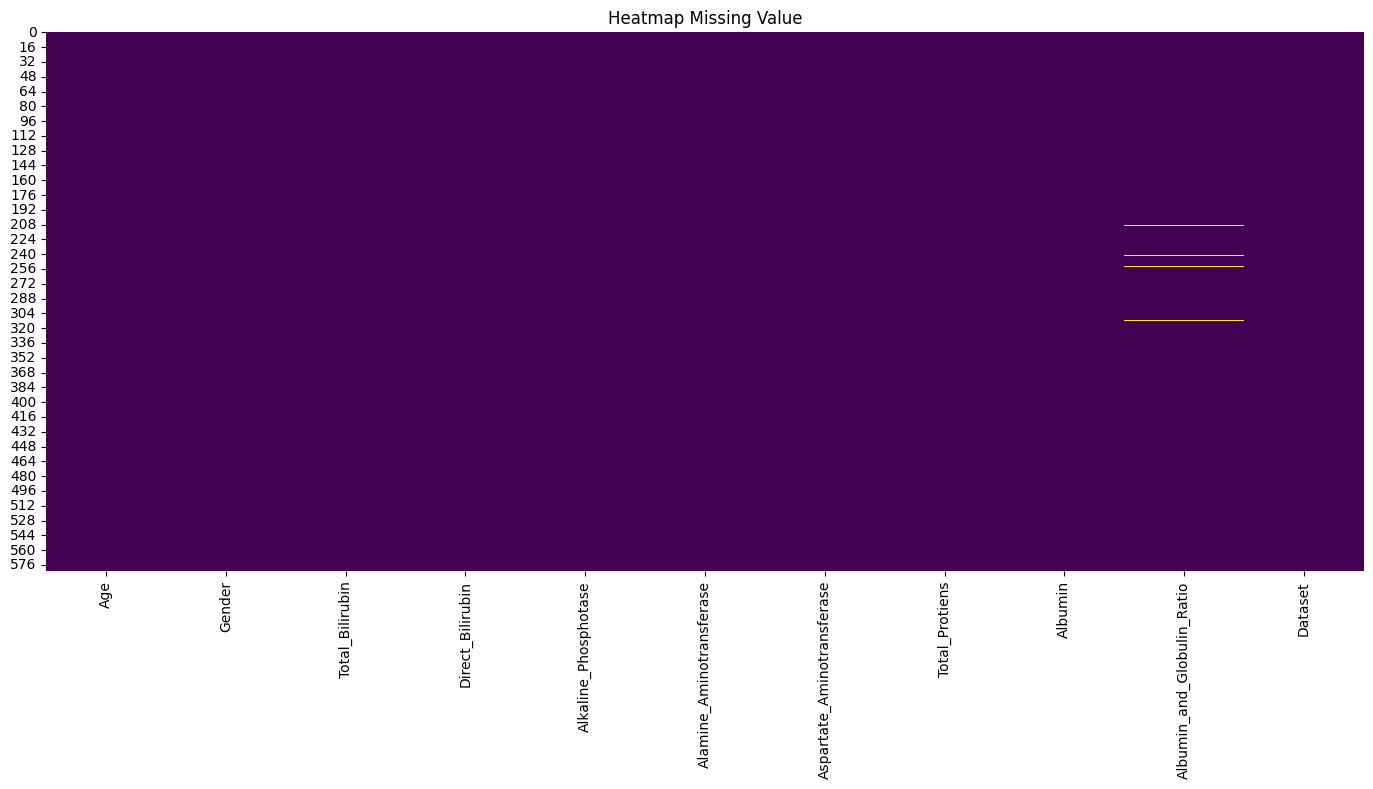

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({'Total Missing': missing_data, 'Percentage (%)': missing_percentage})
print(missing_df[missing_df['Total Missing'] >= 0])

plt.figure(figsize=(17, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Value')
plt.show()

### f. Distribusi Target

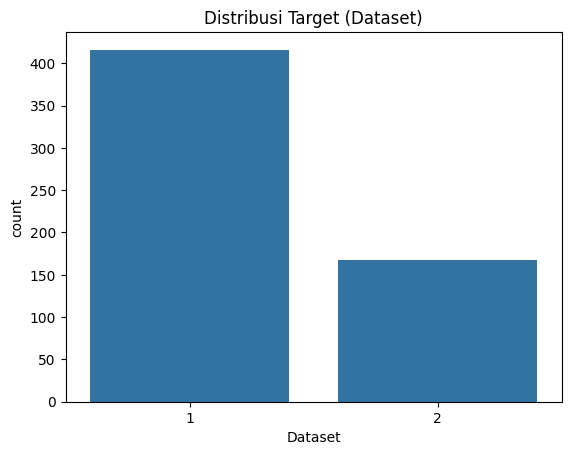

,count
Dataset,
1,416
2,167


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Dataset', data=df)
plt.title('Distribusi Target (Dataset)')
plt.show()

df.value_counts("Dataset")

### g. Checking Outliers

                      Feature  Outlier Count
1             Total_Bilirubin             84
2            Direct_Bilirubin             81
4    Alamine_Aminotransferase             73
3        Alkaline_Phosphotase             69
5  Aspartate_Aminotransferase             66
8  Albumin_and_Globulin_Ratio             10
6              Total_Protiens              8
0                         Age              0
7                     Albumin              0
9                     Dataset              0


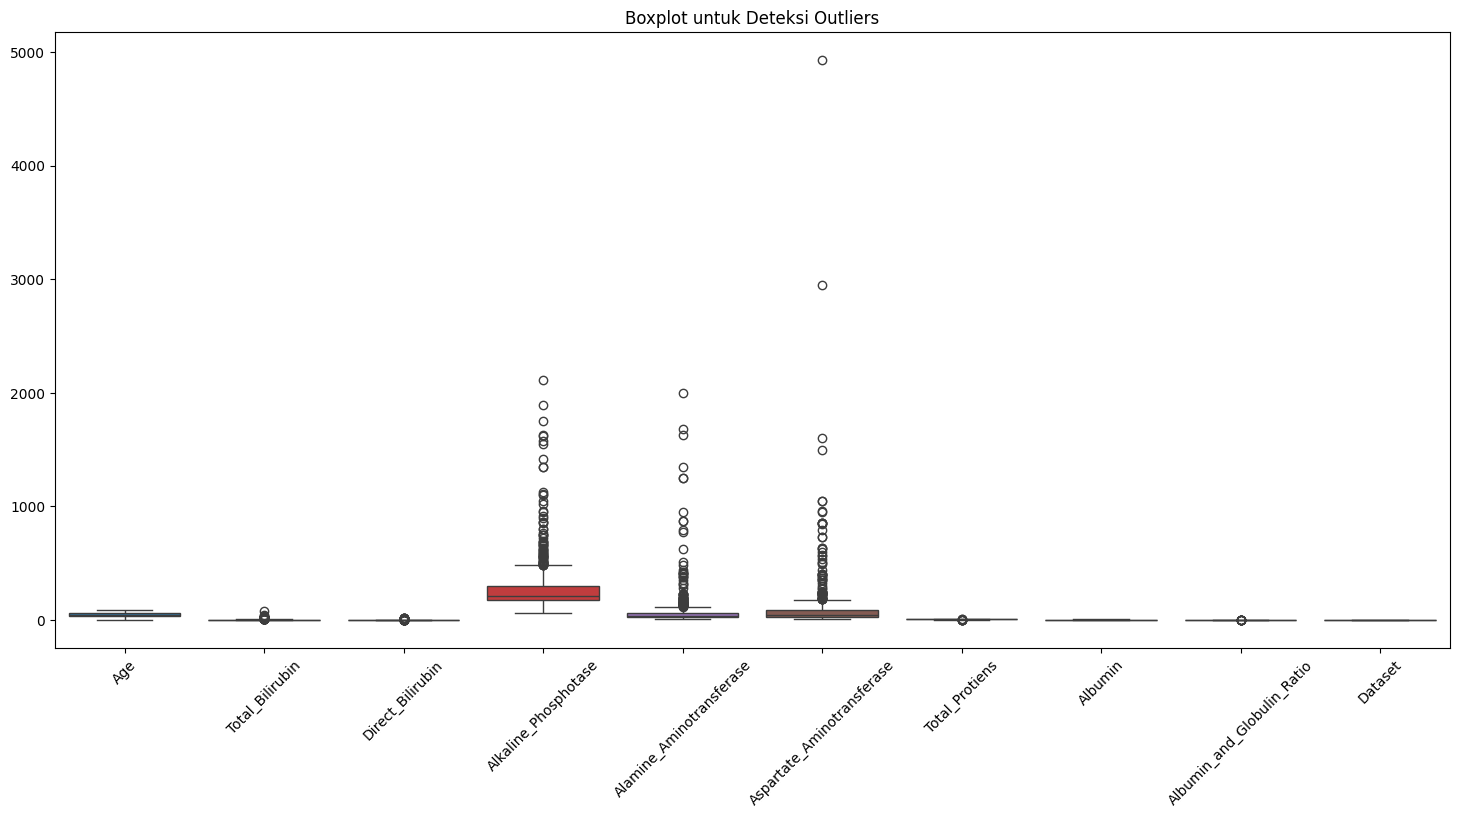

In [107]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_counts = {col: len(detect_outliers_iqr(df, col)) for col in numerical_columns}

outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
outlier_counts_df = outlier_counts_df.sort_values(by='Outlier Count', ascending=False)
print(outlier_counts_df)

plt.figure(figsize=(18, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot untuk Deteksi Outliers')
plt.show()

### h. Checking Skewness

Aspartate_Aminotransferase    10.546177
Alamine_Aminotransferase       6.549192
Total_Bilirubin                4.907474
Alkaline_Phosphotase           3.765106
Direct_Bilirubin               3.212403
Albumin_and_Globulin_Ratio     0.992299
Dataset                        0.947140
Age                           -0.029385
Albumin                       -0.043685
Total_Protiens                -0.285672
dtype: float64


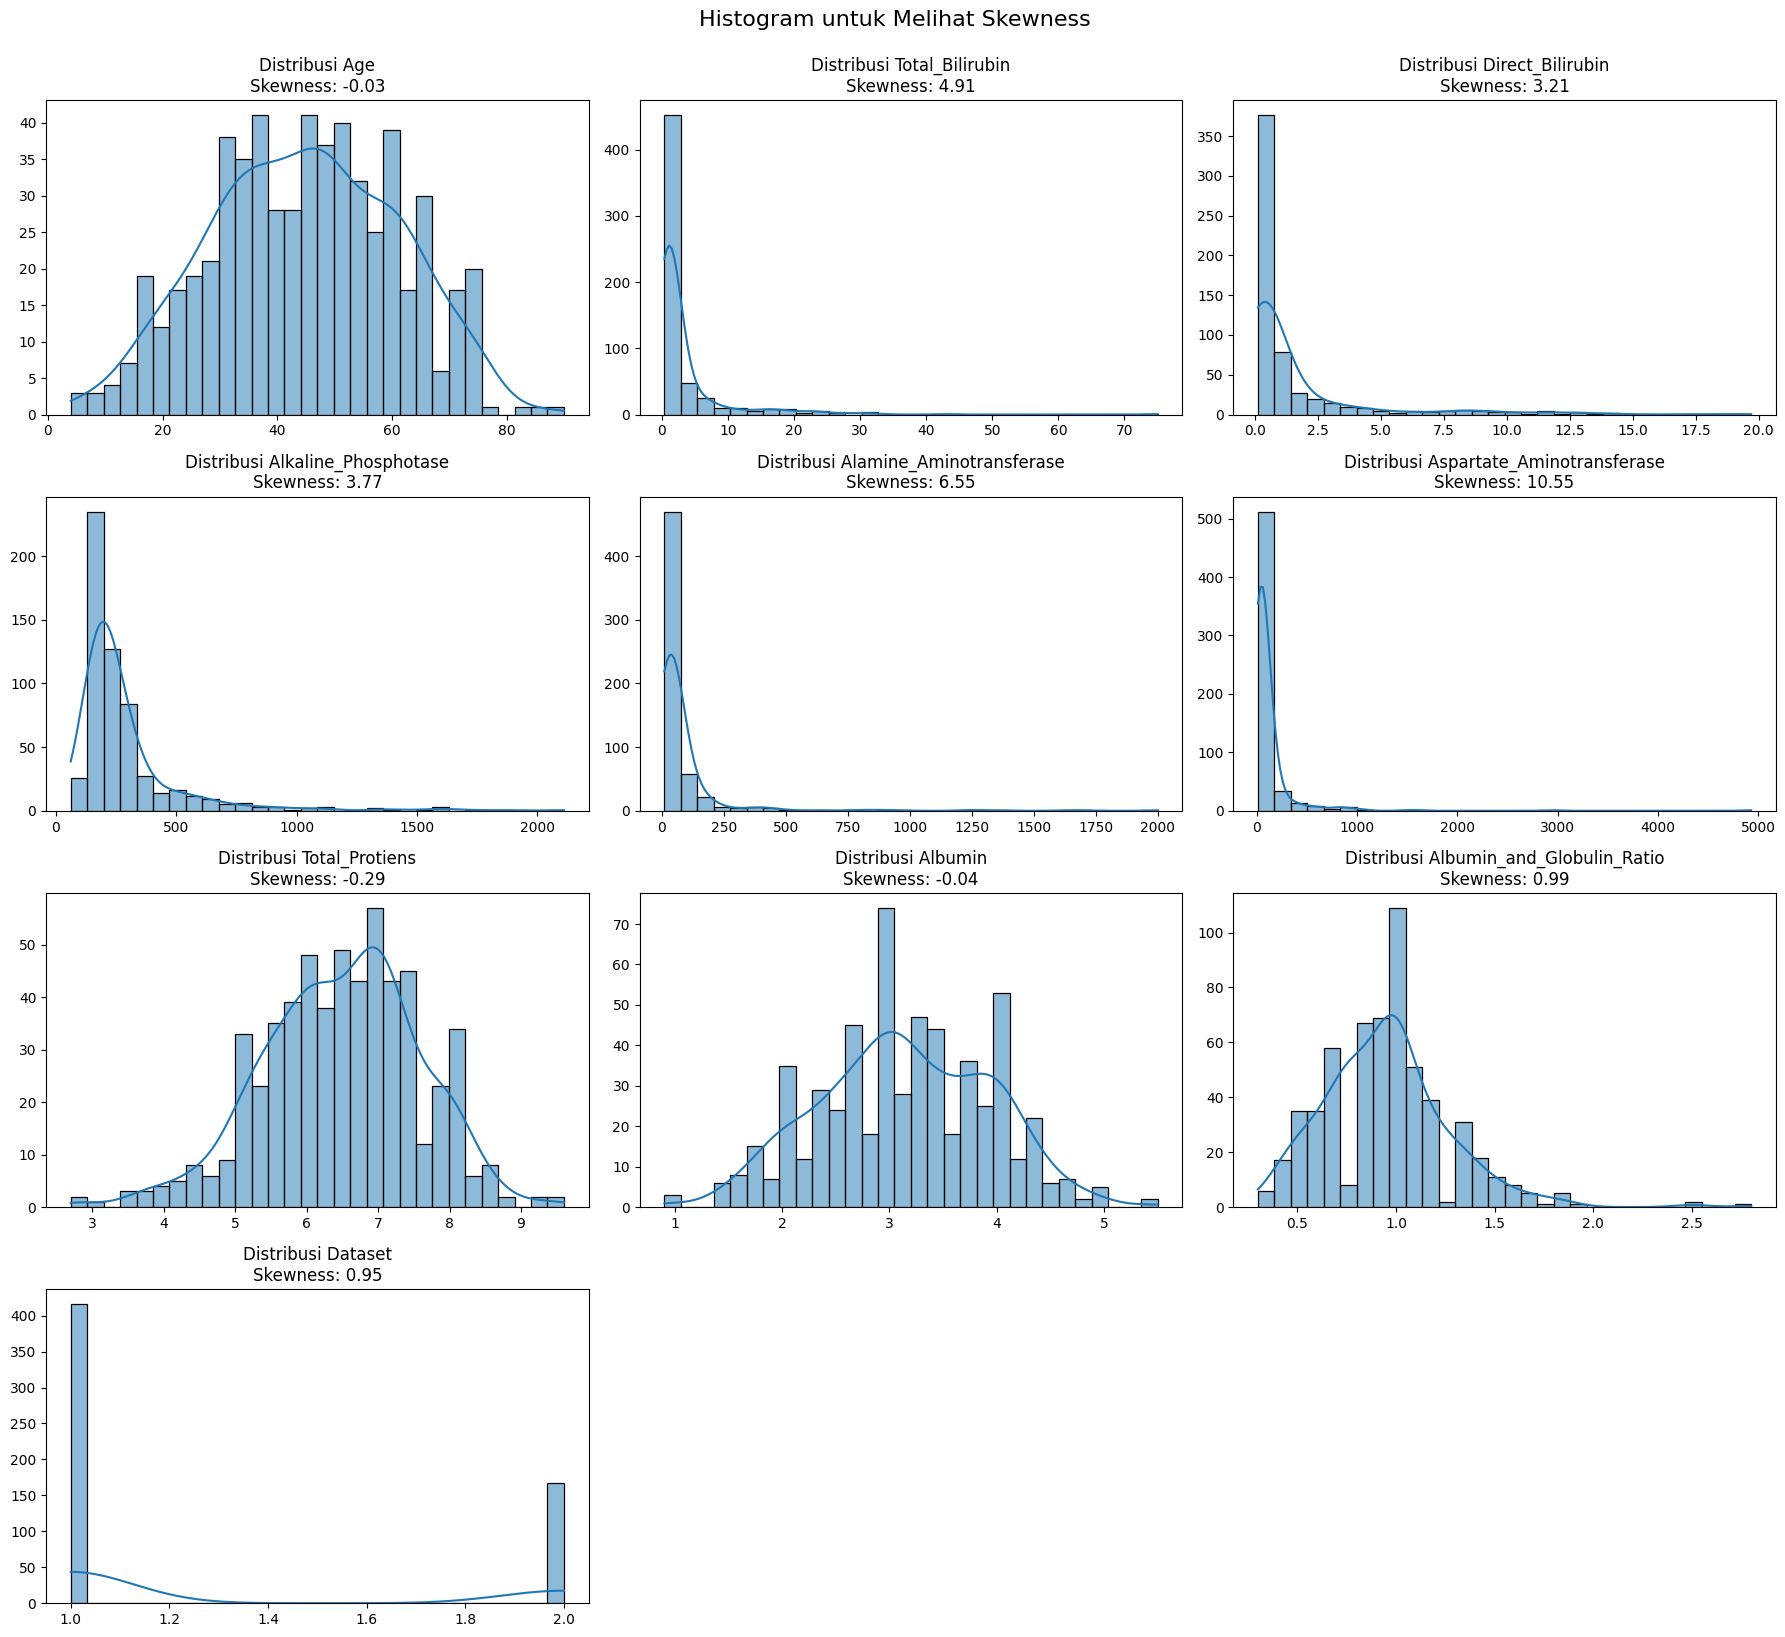

In [108]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

skewness_values = df[numerical_columns].skew().sort_values(ascending=False)
print(skewness_values)

num_features = len(numerical_columns)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Histogram untuk Melihat Skewness', fontsize=16, y=1.02)
plt.show()

### i. Korelasi Antar Fitur

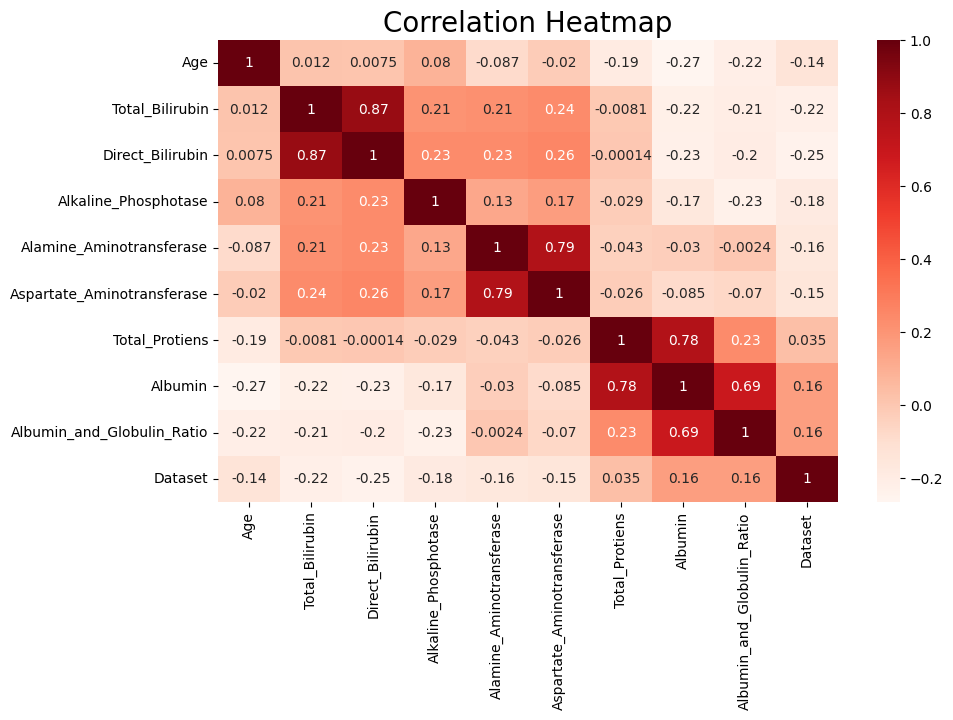

In [109]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

corr = numerical_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

## **Pre-processing**

In [124]:
df2 = df.copy()

### a. Handling Missing Values

                            Total Missing  Percentage (%)
Age                                     0             0.0
Gender                                  0             0.0
Total_Bilirubin                         0             0.0
Direct_Bilirubin                        0             0.0
Alkaline_Phosphotase                    0             0.0
Alamine_Aminotransferase                0             0.0
Aspartate_Aminotransferase              0             0.0
Total_Protiens                          0             0.0
Albumin                                 0             0.0
Albumin_and_Globulin_Ratio              0             0.0
Dataset                                 0             0.0


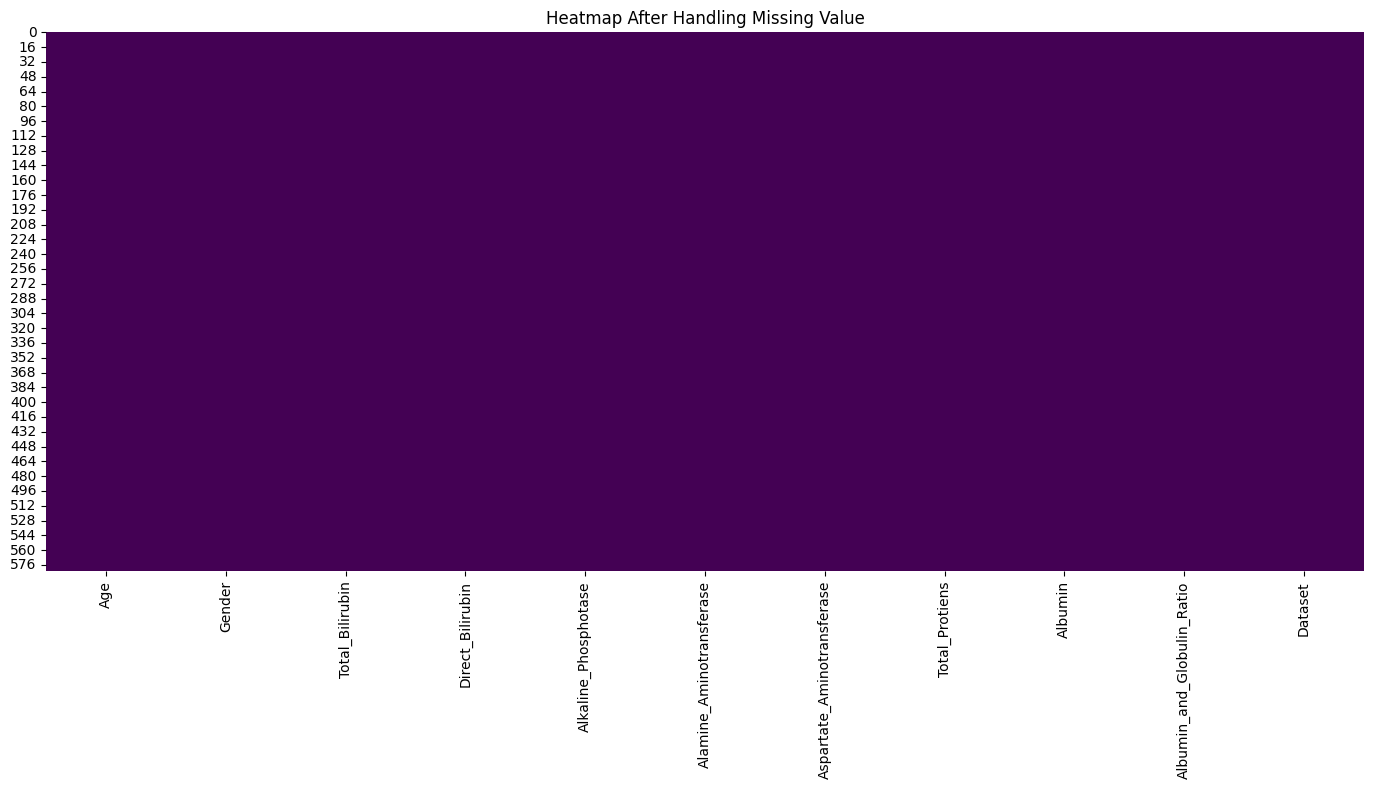

In [125]:
median_value = df2['Albumin_and_Globulin_Ratio'].median()
df2['Albumin_and_Globulin_Ratio'] = df2['Albumin_and_Globulin_Ratio'].fillna(median_value)

missing_data = df2.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df2)) * 100

missing_df2 = pd.DataFrame({'Total Missing': missing_data, 'Percentage (%)': missing_percentage})
print(missing_df2[missing_df2['Total Missing'] >= 0])

plt.figure(figsize=(17, 7))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap After Handling Missing Value')
plt.show()

### b. Handling Outliers

                      Feature  Outlier Count
0                         Age              0
1             Total_Bilirubin              0
2            Direct_Bilirubin              0
3        Alkaline_Phosphotase              0
4    Alamine_Aminotransferase              0
5  Aspartate_Aminotransferase              0
6              Total_Protiens              0
7                     Albumin              0
8  Albumin_and_Globulin_Ratio              0
9                     Dataset              0


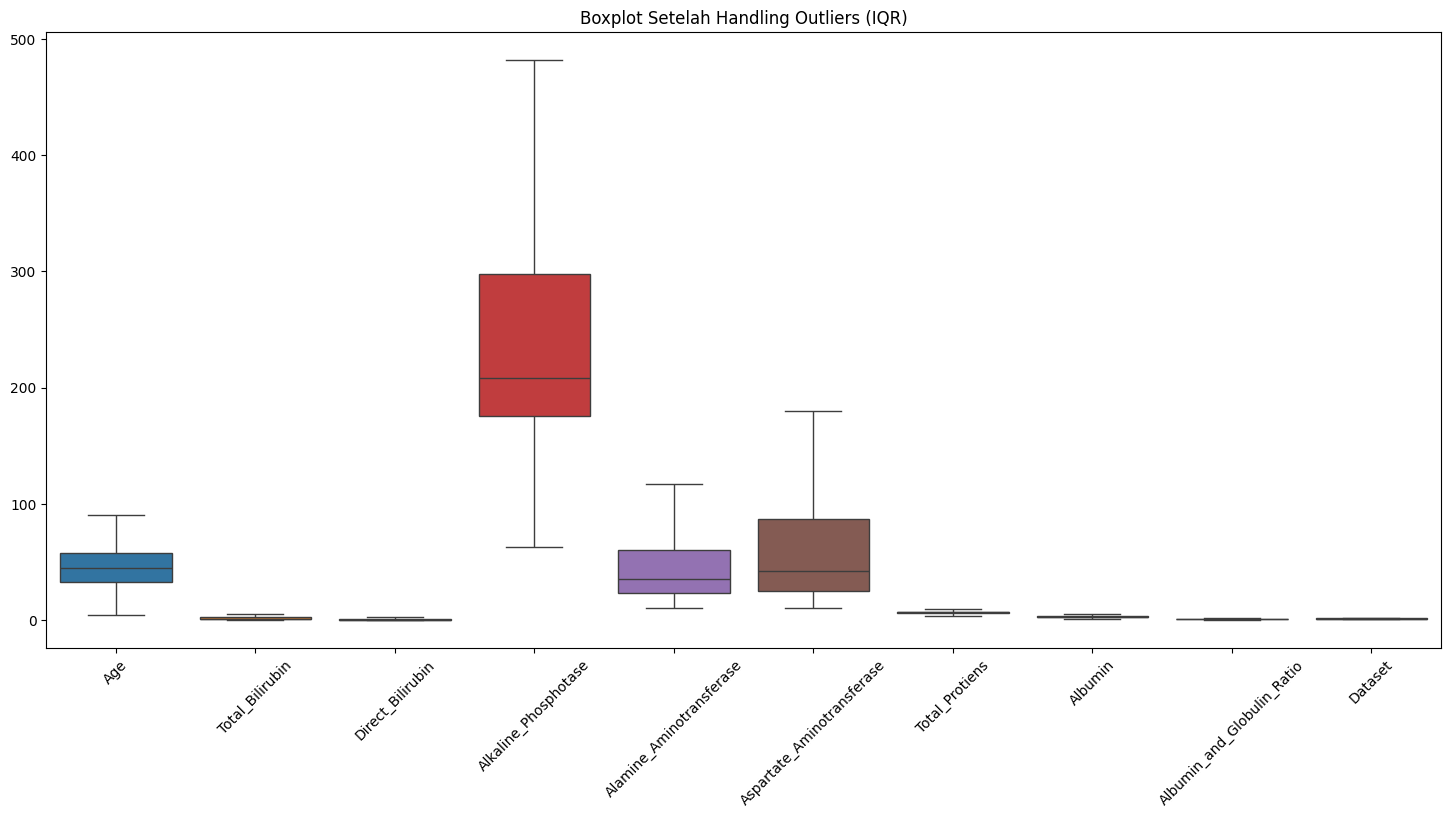

In [126]:
target_column = 'dataset'

numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != target_column]

def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

for col in numerical_columns:
    handle_outliers_iqr(df2, col)

outlier_counts = {col: len(detect_outliers_iqr(df2, col)) for col in numerical_columns}

outlier_counts_df2 = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
outlier_counts_df2 = outlier_counts_df2.sort_values(by='Outlier Count', ascending=False)
print(outlier_counts_df2)

plt.figure(figsize=(18, 8))
sns.boxplot(data=df2[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot Setelah Handling Outliers (IQR)')
plt.show()

### c. Handling Skewness

Skewness awal:
Aspartate_Aminotransferase    1.188029
Alamine_Aminotransferase      1.088208
Total_Bilirubin               1.218379
Alkaline_Phosphotase          1.036510
Direct_Bilirubin              1.250245
Albumin_and_Globulin_Ratio    0.354913
Age                          -0.029385
Albumin                      -0.043685
Total_Protiens               -0.203910
dtype: float64

Skewness setelah handling:
Aspartate_Aminotransferase    0.321825
Alamine_Aminotransferase      0.266109
Total_Bilirubin               0.672224
Alkaline_Phosphotase          0.335820
Direct_Bilirubin              0.420138
Albumin_and_Globulin_Ratio    0.354913
Age                          -0.029385
Albumin                      -0.043685
Total_Protiens               -0.203910
dtype: float64


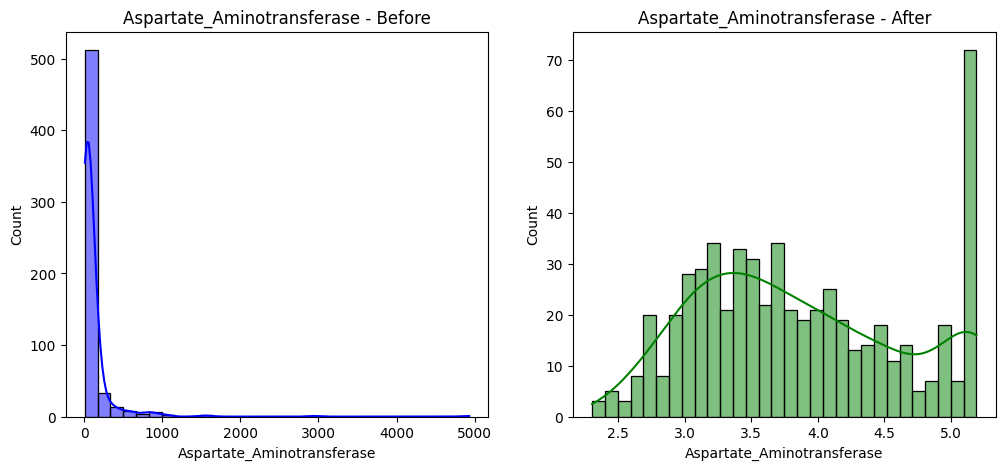

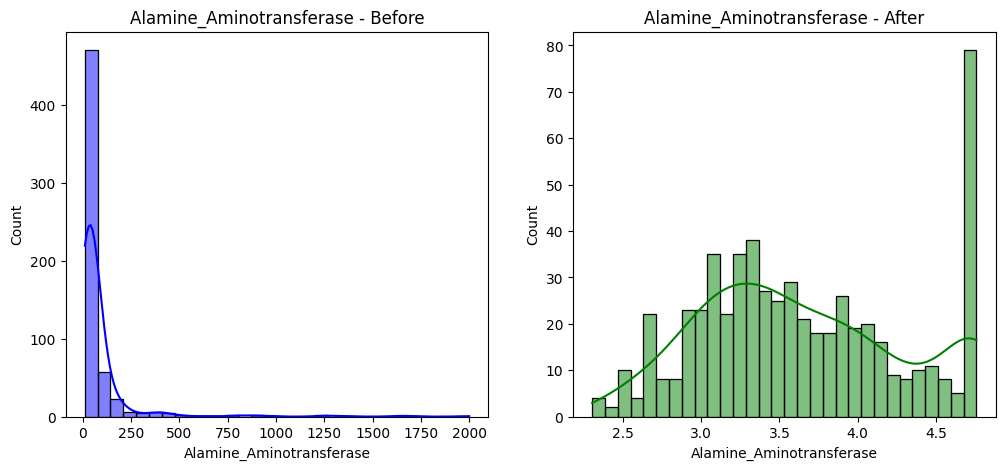

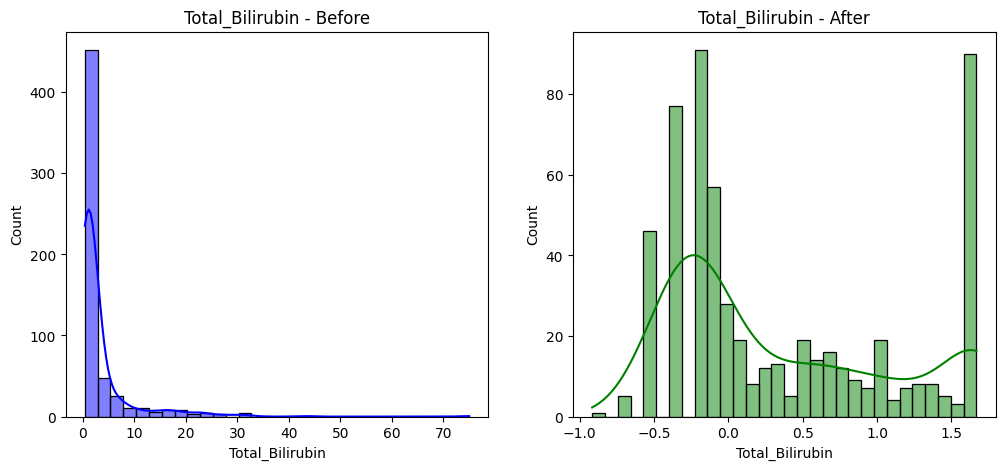

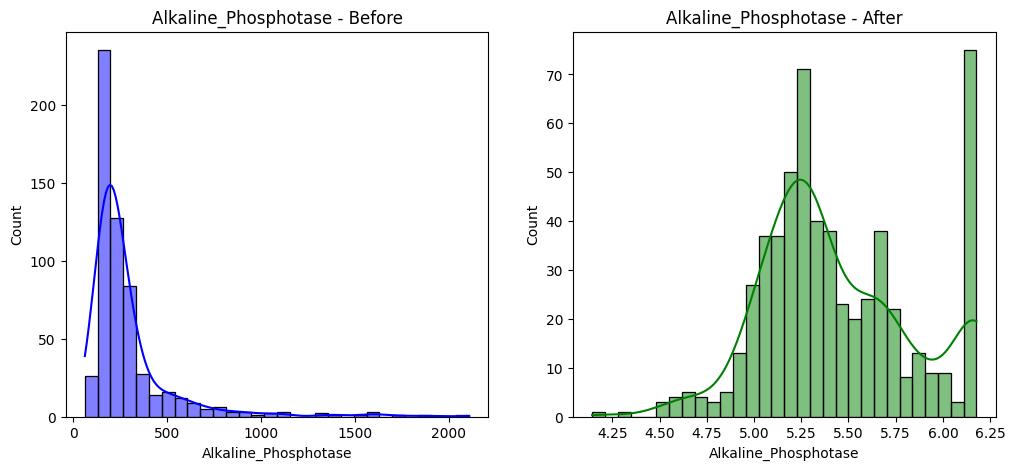

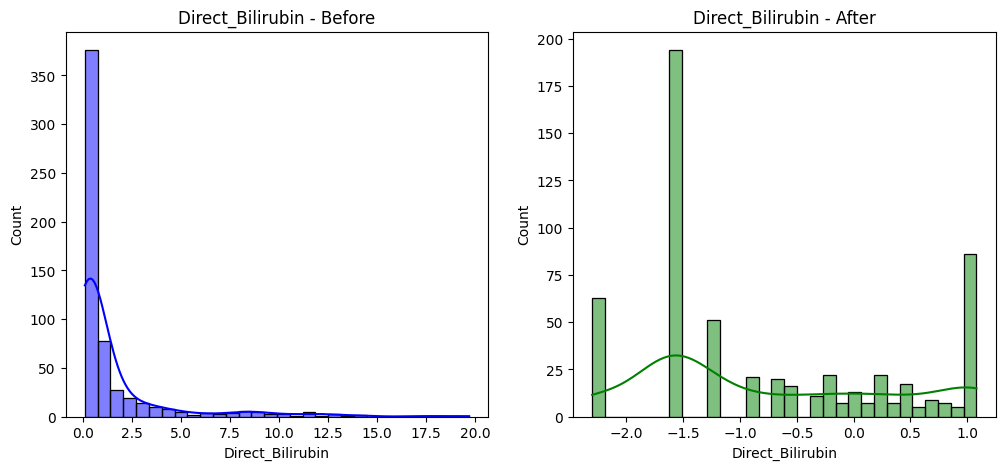

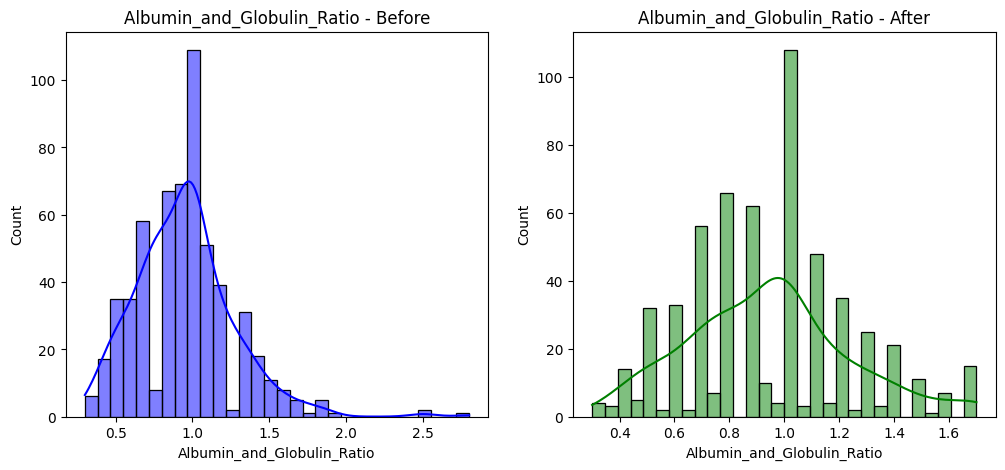

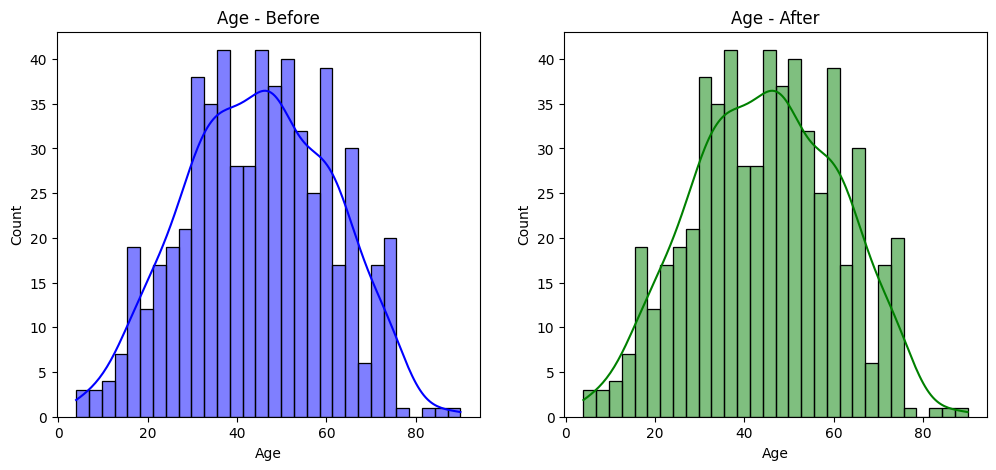

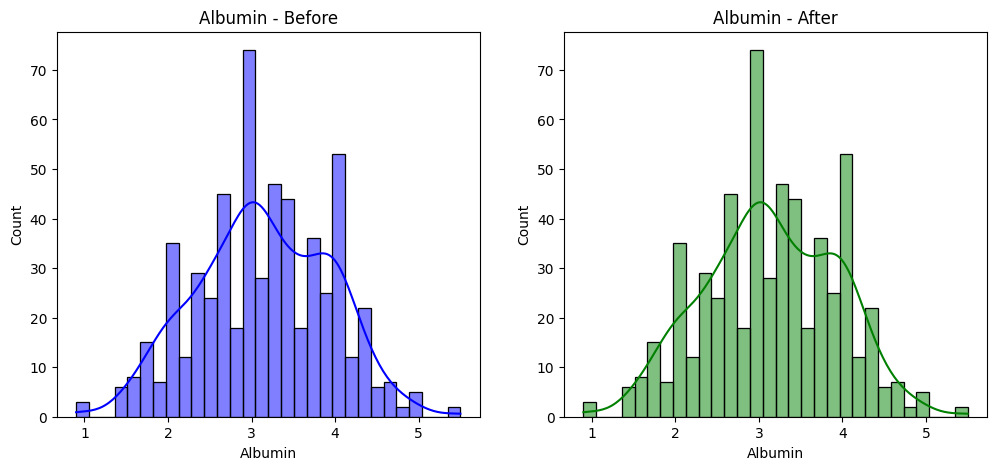

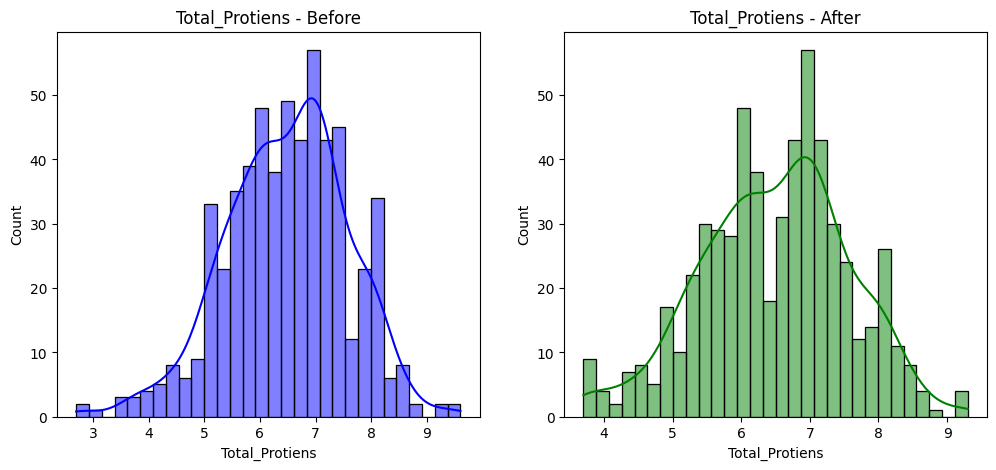

In [127]:
import numpy as np

cols_to_check = ['Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Total_Bilirubin',
                 'Alkaline_Phosphotase', 'Direct_Bilirubin', 'Albumin_and_Globulin_Ratio',
                 'Age', 'Albumin', 'Total_Protiens']

print("Skewness awal:")
skew_before = df2[cols_to_check].skew()
print(skew_before)

def handle_skewness(series):
    skew_val = series.skew()
    if skew_val > 1:
        if (series <= 0).any():
            series = series - series.min() + 1
        return np.log(series)
    elif 0.5 < skew_val <= 1:
        if (series < 0).any():
            series = series - series.min()
        return np.sqrt(series)
    elif skew_val < -1:
        if (series >= 0).any():
            series = -series + series.max() + 1
        return np.log(series)
    else:
        return series

for col in cols_to_check:
    df2[col] = handle_skewness(df2[col])

print("\nSkewness setelah handling:")
skew_after = df2[cols_to_check].skew()
print(skew_after)

for col in cols_to_check:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'{col} - Before')

    plt.subplot(1,2,2)
    sns.histplot(df2[col], kde=True, bins=30, color='green')
    plt.title(f'{col} - After')

    plt.show()

### e. Encoding Fitur Katagorikal

In [128]:
df2['Gender'] = df2['Gender'].map({'Male': 1, 'Female': 0})

gender_compare = pd.DataFrame({
    'Gender (Before Encoding)': df['Gender'].head().values,
    'Gender (After Encoding)': df2['Gender'].head().values
})

print("Perbandingan kolom 'Gender' sebelum dan sesudah encoding:\n")
display(gender_compare)

Perbandingan kolom 'Gender' sebelum dan sesudah encoding:



,Gender (Before Encoding),Gender (After Encoding)
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Male,1


### f. Ubah Nilai Target

In [129]:
df2['Dataset'] = df2['Dataset'].replace({1: 0, 2: 1})

dataset_compare = pd.DataFrame({
    'Dataset (Before)': df['Dataset'].head().values,
    'Dataset (After)': df2['Dataset'].head().values
})

print("Target sebelum dan sesudah transformasi:\n")
display(dataset_compare)

Target sebelum dan sesudah transformasi:



,Dataset (Before),Dataset (After)
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


### g. Split Data

In [130]:
from sklearn.model_selection import train_test_split

X = df2.drop('Dataset', axis=1)
y = df2['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### h. Scaling

In [131]:
from sklearn.preprocessing import StandardScaler

df_train_before = pd.DataFrame(X_train.copy())
df_test_before = pd.DataFrame(X_test.copy())

print("Sebelum Scaling (Training):")
display(df_train_before.describe().T.round(4))

print("Sebelum Scaling (Testing):")
display(df_test_before.describe().T.round(4))

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_train_after = pd.DataFrame(X_train_scaled, columns=X.columns)
df_test_after = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nSetelah Scaling (Training):")
display(df_train_after.describe().T.round(4))

print(" Setelah Scaling (Testing):")
display(df_test_after.describe().T.round(4))

Sebelum Scaling (Training):


,count,mean,std,min,25%,50%,75%,max
Age,466.0,44.5365,16.0735,4.0000,32.0000,45.0000,57.7500,85.0000
Gender,466.0,0.7554,0.4303,0.0000,1.0000,1.0000,1.0000,1.0000
Total_Bilirubin,466.0,0.3538,0.7597,-0.9163,-0.2231,0.0000,0.9933,1.6677
Direct_Bilirubin,466.0,-0.7343,1.1246,-2.3026,-1.6094,-1.2040,0.2624,1.0818
Alkaline_Phosphotase,466.0,5.4384,0.4050,4.1431,5.1648,5.3423,5.6929,6.1774
Alamine_Aminotransferase,466.0,3.6474,0.6664,2.3026,3.1355,3.5835,4.1109,4.7600
Aspartate_Aminotransferase,466.0,3.8728,0.7827,2.3026,3.2581,3.7377,4.4745,5.1930
Total_Protiens,466.0,6.4788,1.0591,3.7000,5.8000,6.5500,7.2000,9.3000
Albumin,466.0,3.1215,0.7867,0.9000,2.6000,3.1000,3.7000,5.5000
Albumin_and_Globulin_Ratio,466.0,0.9317,0.2889,0.3000,0.7000,0.9300,1.1000,1.7000


Sebelum Scaling (Testing):


,count,mean,std,min,25%,50%,75%,max
Age,117.0,45.5812,16.6895,4.0000,35.0000,46.0000,58.0000,90.0000
Gender,117.0,0.7607,0.4285,0.0000,1.0000,1.0000,1.0000,1.0000
Total_Bilirubin,117.0,0.2852,0.7432,-0.6931,-0.2231,-0.1054,0.7419,1.6677
Direct_Bilirubin,117.0,-0.8514,1.1010,-2.3026,-1.6094,-1.2040,0.0000,1.0818
Alkaline_Phosphotase,117.0,5.4542,0.4072,4.5850,5.1930,5.3279,5.8021,6.1774
Alamine_Aminotransferase,117.0,3.6519,0.6280,2.3026,3.2189,3.4657,4.0254,4.7600
Aspartate_Aminotransferase,117.0,3.8115,0.7735,2.4849,3.1781,3.6889,4.4067,5.1930
Total_Protiens,117.0,6.5214,1.1085,3.7000,5.9000,6.6000,7.2000,9.3000
Albumin,117.0,3.2231,0.8282,1.4000,2.7000,3.1000,3.9000,5.0000
Albumin_and_Globulin_Ratio,117.0,0.9778,0.3229,0.4000,0.7400,1.0000,1.2000,1.7000



Setelah Scaling (Training):


,count,mean,std,min,25%,50%,75%,max
Age,466.0,0.0,1.0011,-2.5247,-0.7808,0.0289,0.8230,2.5201
Gender,466.0,-0.0,1.0011,-1.7572,0.5691,0.5691,0.5691,0.5691
Total_Bilirubin,466.0,0.0,1.0011,-1.6738,-0.7603,-0.4663,0.8426,1.7314
Direct_Bilirubin,466.0,0.0,1.0011,-1.3960,-0.7790,-0.4181,0.8871,1.6165
Alkaline_Phosphotase,466.0,-0.0,1.0011,-3.2017,-0.6762,-0.2374,0.6291,1.8269
Alamine_Aminotransferase,466.0,-0.0,1.0011,-2.0203,-0.7691,-0.0960,0.6963,1.6715
Aspartate_Aminotransferase,466.0,-0.0,1.0011,-2.0083,-0.7862,-0.1729,0.7695,1.6884
Total_Protiens,466.0,-0.0,1.0011,-2.6265,-0.6416,0.0673,0.6817,2.6667
Albumin,466.0,0.0,1.0011,-2.8268,-0.6636,-0.0273,0.7362,3.0267
Albumin_and_Globulin_Ratio,466.0,0.0,1.0011,-2.1885,-0.8026,-0.0057,0.5833,2.6621


 Setelah Scaling (Testing):


,count,mean,std,min,25%,50%,75%,max
Age,117.0,0.0651,1.0394,-2.5247,-0.5939,0.0911,0.8385,2.8315
Gender,117.0,0.0124,0.9968,-1.7572,0.5691,0.5691,0.5691,0.5691
Total_Bilirubin,117.0,-0.0904,0.9794,-1.3797,-0.7603,-0.6051,0.5115,1.7314
Direct_Bilirubin,117.0,-0.1042,0.9800,-1.3960,-0.7790,-0.4181,0.6536,1.6165
Alkaline_Phosphotase,117.0,0.0391,1.0067,-2.1095,-0.6066,-0.2731,0.8992,1.8269
Alamine_Aminotransferase,117.0,0.0067,0.9435,-2.0203,-0.6438,-0.2729,0.5678,1.6715
Aspartate_Aminotransferase,117.0,-0.0784,0.9893,-1.7751,-0.8886,-0.2353,0.6829,1.6884
Total_Protiens,117.0,0.0403,1.0478,-2.6265,-0.5471,0.1146,0.6817,2.6667
Albumin,117.0,0.1293,1.0539,-2.1906,-0.5363,-0.0273,0.9907,2.3904
Albumin_and_Globulin_Ratio,117.0,0.1598,1.1186,-1.8420,-0.6640,0.2368,0.9298,2.6621


### i. SMOTE

In [132]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Sebelum SMOTE:\n", y_train.value_counts())
print("\nSetelah SMOTE:\n", y_train_balanced.value_counts())

Sebelum SMOTE:
 Dataset
0    333
1    133
Name: count, dtype: int64

Setelah SMOTE:
 Dataset
0    333
1    333
Name: count, dtype: int64


## **Implementasi Klasifikasi SVM**

Akurasi SVM: 0.7094017094017094

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        83
           1       0.00      0.00      0.00        34

    accuracy                           0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


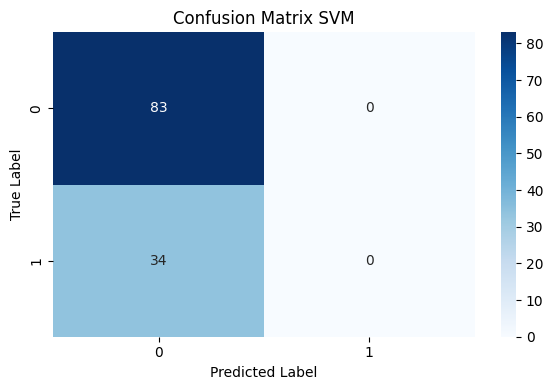

In [133]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    dw = self.lambda_param * self.w
                    db = 0
                else:
                    dw = self.lambda_param * self.w - y_[idx] * x_i
                    db = -y_[idx]

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)

X_train_np = X_train_balanced
y_train_np = y_train_balanced

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

svm = SVM()
svm.fit(X_train_np, y_train_np)
predictions = svm.predict(X_test_np)

accuracy = accuracy_score(y_test_np, predictions)
conf_matrix = confusion_matrix(y_test_np, predictions)
report = classification_report(y_test_np, predictions)

print("Akurasi SVM:", accuracy)
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [135]:
import pickle

filename = "prediksi_penyakit_hati.sav"
pickle.dump(svm, open(filename, "wb"))